![miad4.png](Archivos/miad4.png)

# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from dython import nominal
import matplotlib.pyplot as plt


In [2]:
# define functions
def lower_names(df):
    l_names = {col: col.lower() for col in df.columns}
    return df.rename(l_names)

def plot_null_vals(df):
    null_bool = df.select([pl.col(col).is_null() for col in df.columns])
    
    null_array = null_bool.to_numpy().astype(int).T
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.imshow(null_array, aspect='auto', cmap='viridis', interpolation='none')
    
    ax.set_yticks(range(len(df.columns)))
    ax.set_yticklabels(df.columns)
    ax.set_xticks([])
    plt.title('Valores nulos por columna')
    
    return plt.show()

def data_type(df):
    df_type = pl.DataFrame(
        {
            "col_name": df.columns,
            "var_type": [df_h[col].dtype for col in df.columns]
        }
    )

    return df_type

def impute_mode(df):
    
    for col in df.columns:
        n_row = df.shape[0]   
        mode_col = df[col].drop_nulls().mode().item()
        
        if df[col].null_count() > 0:
            df = df.with_columns(
                pl.col(col).fill_null(mode_col))
    return df

In [3]:
# load data
df_h = pl.read_csv("/Users/sebas/OneDrive/Documents/repositorio_cepap/CEPAP/data_source/educacion/2025/Resultados__nicos_Saber_11_20250303.tsv", separator="\t", decimal_comma = True)

df_h.head()

PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NACIONALIDAD,ESTU_PAIS_RESIDE,ESTU_PRIVADO_LIBERTAD,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
i64,str,str,str,str,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64
20131,"""CR""","""SB11201310000414""","""URBANO""","""N""","""B""","""ACADÉMICO""",311848000812,311848000812,11,11001,22574,"""BOGOTA""","""FEMENINO""","""COMPLETA""","""BOGOTÁ D.C.""","""NO OFICIAL""","""GIMN FEMENINO""","""GIMN FEMENINO""","""S""",11,11001,11,11001,"""BOGOTÁ""","""BOGOTÁ""","""PUBLICAR""","""ESTUDIANTE""","""08/08/1994""","""F""","""BOGOTÁ D.C.""","""BOGOTÁ D.C.""","""COLOMBIA""","""COLOMBIA""","""N""","""Cuatro""","""Educación profesional completa""","""Educación profesional completa""","""Estrato 6""","""Cuatro""","""Si""","""Si""","""Si""","""Si""","""B+""","""94""","""88""",null,null,null,null
20194,"""TI""","""SB11201940464873""","""RURAL""","""N""","""A""","""TÉCNICO/ACADÉMICO""",141016000305,241016000342,41,41016,194878,"""HUILA""","""MIXTO""","""COMPLETA""","""AIPE""","""OFICIAL""","""INSTITUCION EDUCATIVA JESUS MA…","""DINDAL""","""N""",41,41016,41,41016,"""HUILA""","""HUILA""","""PUBLICAR""","""ESTUDIANTE""","""15/02/2003""","""F""","""AIPE""","""AIPE""","""COLOMBIA""","""COLOMBIA""","""N""","""Dos""","""Postgrado""","""Primaria completa""","""Estrato 2""","""1 a 2""","""No""","""Si""","""Si""","""Si""","""B1""","""71""","""66""",70,65,69,339
20194,"""TI""","""SB11201940464873""","""RURAL""","""N""","""A""","""TÉCNICO/ACADÉMICO""",141016000305,241016000342,41,41016,194878,"""HUILA""","""MIXTO""","""COMPLETA""","""AIPE""","""OFICIAL""","""INSTITUCION EDUCATIVA JESUS MA…","""DINDAL""","""N""",41,41016,41,41016,"""HUILA""","""HUILA""","""PUBLICAR""","""ESTUDIANTE""","""15/02/2003""","""F""","""AIPE""","""AIPE""","""COLOMBIA""","""COLOMBIA""","""N""","""Dos""","""Postgrado""","""Primaria completa""","""Estrato 2""","""1 a 2""","""No""","""Si""","""Si""","""Si""","""B1""","""71""","""66""",70,65,69,339
20122,"""TI""","""SB11201220204399""","""URBANO""","""N""","""A""","""TÉCNICO/ACADÉMICO""",163130000718,163130000718,63,63130,13029,"""QUINDIO""","""MIXTO""","""MAÑANA""","""CALARCÁ""","""OFICIAL""","""INSTITUCION EDUCATIVA ANTONIO …","""ANTONIO NARIÑO""","""S""",63,63130,63,63130,"""QUINDIO""","""QUINDIO""","""PUBLICAR""","""ESTUDIANTE""","""20/05/1996""","""F""","""CALARCÁ""","""CALARCÁ""","""COLOMBIA""","""COLOMBIA""","""N""","""Dos""","""Secundaria (Bachillerato) inco…","""No sabe""","""Estrato 1""","""Cuatro""","""No""","""Si""","""Si""","""No""","""A1""","""48""","""45""",null,null,null,null
20132,"""TI""","""SB11201320464198""","""URBANO""","""N""","""A""","""TÉCNICO""",119001000559,119001000559,19,19001,46391,"""CAUCA""","""FEMENINO""","""MAÑANA""","""POPAYÁN""","""OFICIAL""","""CRISTO REY""","""SEDE CRISTO REY""","""S""",19,19001,19,19001,"""CAUCA""","""CAUCA""","""PUBLICAR""","""ESTUDIANTE""","""19/03/1997""","""F""","""POPAYÁN""","""POPAYÁN""","""COLOMBIA""","""COLOMBIA""","""N""","""Cinco""","""Educación profesional completa""","

In [4]:
# dimensiones
print("las dimensiones de la tabla original correponden a " + str(df_h.shape[0]) + " filas y " + str(df_h.shape[1]) + " columnas.")

las dimensiones de la tabla original correponden a 7109704 filas y 51 columnas.


In [5]:
# clean names
df_h = lower_names(df_h)

df_h.head()

periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
i64,str,str,str,str,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64
20131,"""CR""","""SB11201310000414""","""URBANO""","""N""","""B""","""ACADÉMICO""",311848000812,311848000812,11,11001,22574,"""BOGOTA""","""FEMENINO""","""COMPLETA""","""BOGOTÁ D.C.""","""NO OFICIAL""","""GIMN FEMENINO""","""GIMN FEMENINO""","""S""",11,11001,11,11001,"""BOGOTÁ""","""BOGOTÁ""","""PUBLICAR""","""ESTUDIANTE""","""08/08/1994""","""F""","""BOGOTÁ D.C.""","""BOGOTÁ D.C.""","""COLOMBIA""","""COLOMBIA""","""N""","""Cuatro""","""Educación profesional completa""","""Educación profesional completa""","""Estrato 6""","""Cuatro""","""Si""","""Si""","""Si""","""Si""","""B+""","""94""","""88""",null,null,null,null
20194,"""TI""","""SB11201940464873""","""RURAL""","""N""","""A""","""TÉCNICO/ACADÉMICO""",141016000305,241016000342,41,41016,194878,"""HUILA""","""MIXTO""","""COMPLETA""","""AIPE""","""OFICIAL""","""INSTITUCION EDUCATIVA JESUS MA…","""DINDAL""","""N""",41,41016,41,41016,"""HUILA""","""HUILA""","""PUBLICAR""","""ESTUDIANTE""","""15/02/2003""","""F""","""AIPE""","""AIPE""","""COLOMBIA""","""COLOMBIA""","""N""","""Dos""","""Postgrado""","""Primaria completa""","""Estrato 2""","""1 a 2""","""No""","""Si""","""Si""","""Si""","""B1""","""71""","""66""",70,65,69,339
20194,"""TI""","""SB11201940464873""","""RURAL""","""N""","""A""","""TÉCNICO/ACADÉMICO""",141016000305,241016000342,41,41016,194878,"""HUILA""","""MIXTO""","""COMPLETA""","""AIPE""","""OFICIAL""","""INSTITUCION EDUCATIVA JESUS MA…","""DINDAL""","""N""",41,41016,41,41016,"""HUILA""","""HUILA""","""PUBLICAR""","""ESTUDIANTE""","""15/02/2003""","""F""","""AIPE""","""AIPE""","""COLOMBIA""","""COLOMBIA""","""N""","""Dos""","""Postgrado""","""Primaria completa""","""Estrato 2""","""1 a 2""","""No""","""Si""","""Si""","""Si""","""B1""","""71""","""66""",70,65,69,339
20122,"""TI""","""SB11201220204399""","""URBANO""","""N""","""A""","""TÉCNICO/ACADÉMICO""",163130000718,163130000718,63,63130,13029,"""QUINDIO""","""MIXTO""","""MAÑANA""","""CALARCÁ""","""OFICIAL""","""INSTITUCION EDUCATIVA ANTONIO …","""ANTONIO NARIÑO""","""S""",63,63130,63,63130,"""QUINDIO""","""QUINDIO""","""PUBLICAR""","""ESTUDIANTE""","""20/05/1996""","""F""","""CALARCÁ""","""CALARCÁ""","""COLOMBIA""","""COLOMBIA""","""N""","""Dos""","""Secundaria (Bachillerato) inco…","""No sabe""","""Estrato 1""","""Cuatro""","""No""","""Si""","""Si""","""No""","""A1""","""48""","""45""",null,null,null,null
20132,"""TI""","""SB11201320464198""","""URBANO""","""N""","""A""","""TÉCNICO""",119001000559,119001000559,19,19001,46391,"""CAUCA""","""FEMENINO""","""MAÑANA""","""POPAYÁN""","""OFICIAL""","""CRISTO REY""","""SEDE CRISTO REY""","""S""",19,19001,19,19001,"""CAUCA""","""CAUCA""","""PUBLICAR""","""ESTUDIANTE""","""19/03/1997""","""F""","""POPAYÁN""","""POPAYÁN""","""COLOMBIA""","""COLOMBIA""","""N""","""Cinco""","""Educación profesional completa""","

In [6]:
# Explorar variables por prefijos
prefjs = ["cole", "estu_", "fami_", "punt_"]

In [7]:
# Columnas colegio
columnas_cole = [col for col in df_h.columns if col.startswith(prefjs[0])]
df_h.select(columnas_cole).head()

cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal
str,str,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str
"""URBANO""","""N""","""B""","""ACADÉMICO""",311848000812,311848000812,11,11001,22574,"""BOGOTA""","""FEMENINO""","""COMPLETA""","""BOGOTÁ D.C.""","""NO OFICIAL""","""GIMN FEMENINO""","""GIMN FEMENINO""","""S"""
"""RURAL""","""N""","""A""","""TÉCNICO/ACADÉMICO""",141016000305,241016000342,41,41016,194878,"""HUILA""","""MIXTO""","""COMPLETA""","""AIPE""","""OFICIAL""","""INSTITUCION EDUCATIVA JESUS MA…","""DINDAL""","""N"""
"""RURAL""","""N""","""A""","""TÉCNICO/ACADÉMICO""",141016000305,241016000342,41,41016,194878,"""HUILA""","""MIXTO""","""COMPLETA""","""AIPE""","""OFICIAL""","""INSTITUCION EDUCATIVA JESUS MA…","""DINDAL""","""N"""
"""URBANO""","""N""","""A""","""TÉCNICO/ACADÉMICO""",163130000718,163130000718,63,63130,13029,"""QUINDIO""","""MIXTO""","""MAÑANA""","""CALARCÁ""","""OFICIAL""","""INSTITUCION EDUCATIVA ANTONIO …","""ANTONIO NARIÑO""","""S"""
"""URBANO""","""N""","""A""","""TÉCNICO""",119001000559,119001000559,19,19001,46391,"""CAUCA""","""FEMENINO""","""MAÑANA""","""POPAYÁN""","""OFICIAL""","""CRISTO REY""","""SEDE CRISTO REY""","""S"""


In [8]:
# Columnas estudiante
columnas_estu = [col for col in df_h.columns if col.startswith(prefjs[1])]
df_h.select(columnas_estu).head()

estu_tipodocumento,estu_consecutivo,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad
str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str
"""CR""","""SB11201310000414""",11,11001,11,11001,"""BOGOTÁ""","""BOGOTÁ""","""PUBLICAR""","""ESTUDIANTE""","""08/08/1994""","""F""","""BOGOTÁ D.C.""","""BOGOTÁ D.C.""","""COLOMBIA""","""COLOMBIA""","""N"""
"""TI""","""SB11201940464873""",41,41016,41,41016,"""HUILA""","""HUILA""","""PUBLICAR""","""ESTUDIANTE""","""15/02/2003""","""F""","""AIPE""","""AIPE""","""COLOMBIA""","""COLOMBIA""","""N"""
"""TI""","""SB11201940464873""",41,41016,41,41016,"""HUILA""","""HUILA""","""PUBLICAR""","""ESTUDIANTE""","""15/02/2003""","""F""","""AIPE""","""AIPE""","""COLOMBIA""","""COLOMBIA""","""N"""
"""TI""","""SB11201220204399""",63,63130,63,63130,"""QUINDIO""","""QUINDIO""","""PUBLICAR""","""ESTUDIANTE""","""20/05/1996""","""F""","""CALARCÁ""","""CALARCÁ""","""COLOMBIA""","""COLOMBIA""","""N"""
"""TI""","""SB11201320464198""",19,19001,19,19001,"""CAUCA""","""CAUCA""","""PUBLICAR""","""ESTUDIANTE""","""19/03/1997""","""F""","""POPAYÁN""","""POPAYÁN""","""COLOMBIA""","""COLOMBIA""","""N"""


In [9]:
# Columnas familia
columnas_fami = [col for col in df_h.columns if col.startswith(prefjs[2])]
df_h.select(columnas_fami).head()

fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora
str,str,str,str,str,str,str,str,str
"""Cuatro""","""Educación profesional completa""","""Educación profesional completa""","""Estrato 6""","""Cuatro""","""Si""","""Si""","""Si""","""Si"""
"""Dos""","""Postgrado""","""Primaria completa""","""Estrato 2""","""1 a 2""","""No""","""Si""","""Si""","""Si"""
"""Dos""","""Postgrado""","""Primaria completa""","""Estrato 2""","""1 a 2""","""No""","""Si""","""Si""","""Si"""
"""Dos""","""Secundaria (Bachillerato) inco…","""No sabe""","""Estrato 1""","""Cuatro""","""No""","""Si""","""Si""","""No"""
"""Cinco""","""Educación profesional completa""","""Educación profesional incomple…","""Estrato 2""","""Ocho""","""No""","""Si""","""Si""","""Si"""


In [10]:
# Columnas puntaje
columnas_punt = [col for col in df_h.columns if col.startswith(prefjs[3])]
df_h.select(columnas_punt).head()

punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
str,str,i64,i64,i64,i64
"""94""","""88""",null,null,null,null
"""71""","""66""",70,65,69,339
"""71""","""66""",70,65,69,339
"""48""","""45""",null,null,null,null
"""43""","""52""",null,null,null,null


In [11]:
# Conteo observaciones por periodo
df_h.group_by("periodo").len()

periodo,len
i64,u32
20194,1096524
20211,15528
20142,546727
20111,32978
20131,35179
…,…
20112,617442
20141,24910
20221,20049


In [12]:
# filter periods
df_h = df_h.filter(df_h["periodo"].is_in([20171, 20172, 20191, 20194]))

df_h.shape

(1670372, 51)

In [13]:
# sample 500.000 records
df_h = df_h.sample(n = 500000, seed = 2025)

In [14]:
#clean data type
df_h = df_h.with_columns(
    pl.col("punt_matematicas").cast(pl.Float64),
    pl.col("punt_ingles").cast(pl.Float64)
)

In [15]:
# print data type
data_type(df_h)

col_name,var_type
str,object
"""periodo""",Int64
"""estu_tipodocumento""",String
"""estu_consecutivo""",String
"""cole_area_ubicacion""",String
"""cole_bilingue""",String
…,…
"""punt_matematicas""",Float64
"""punt_sociales_ciudadanas""",Int64
"""punt_c_naturales""",Int64


In [16]:
cols_punt = [col for col in df_h.columns if col.startswith("punt_")]

df_h.select(cols_punt).describe()

statistic,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
str,f64,f64,f64,f64,f64,f64
"""count""",499988.0,500000.0,500000.0,500000.0,500000.0,500000.0
"""null_count""",12.0,0.0,0.0,0.0,0.0,0.0
"""mean""",49.09884,50.608844,47.75663,49.40955,52.659148,250.154332
"""std""",12.55179,12.11872,12.086802,10.745406,10.375504,51.290681
"""min""",0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",40.0,42.0,38.0,41.0,45.0,211.0
"""50%""",48.0,51.0,47.0,49.0,53.0,247.0
"""75%""",57.0,59.0,57.0,57.0,60.0,286.0
"""max""",100.0,100.0,100.0,100.0,100.0,476.0


In [17]:
# Arbitrary select vars
df_h = df_h.select(["estu_genero", "cole_calendario", "fami_educacionmadre", "fami_educacionpadre",
                    "fami_estratovivienda", "fami_tienecomputador", "cole_area_ubicacion", "fami_tieneinternet", "punt_global"])

In [18]:
# Conteo de la cantidad de valores perdidos y su proporción por columna
pl.DataFrame(
    {
        "col_name": df_h.columns,
        "missing_values": [df_h[col].null_count() for col in df_h.columns],
        "propotion_missing_values": [round((df_h[col].null_count() / df_h.shape[0]), 3) * 100 for col in df_h.columns]
    }
) \
.sort("missing_values", descending = True)

col_name,missing_values,propotion_missing_values
str,i64,f64
"""fami_estratovivienda""",29308,5.9
"""fami_tieneinternet""",26468,5.3
"""fami_educacionpadre""",25887,5.2
"""fami_educacionmadre""",25831,5.2
"""fami_tienecomputador""",13156,2.6
"""estu_genero""",78,0.0
"""cole_calendario""",0,0.0
"""cole_area_ubicacion""",0,0.0
"""punt_global""",0,0.0


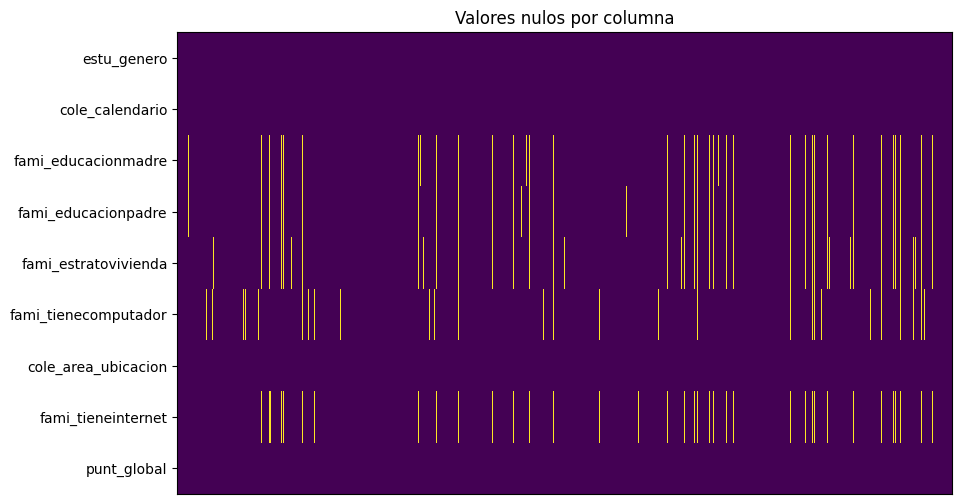

In [19]:
plot_null_vals(df_h)

In [20]:
# imputar datos faltantes con la moda
df_h = impute_mode(df_h)

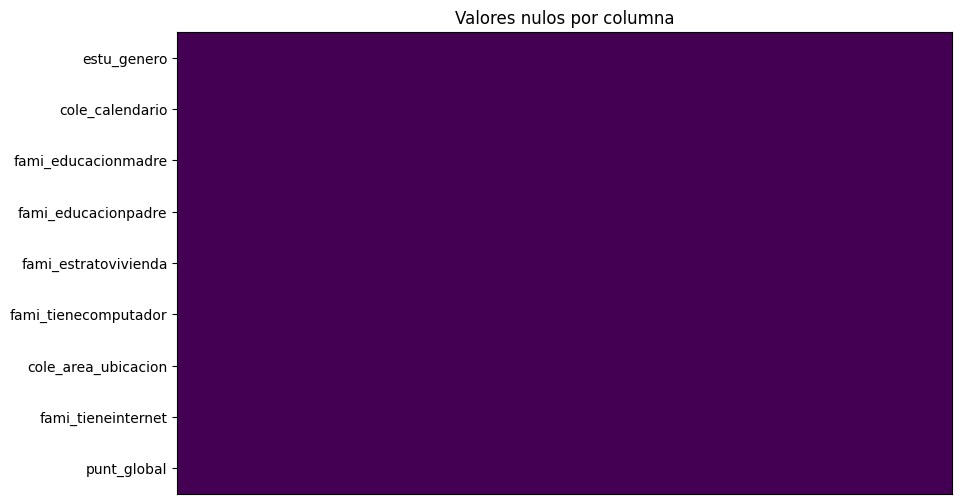

In [21]:
# verfy delete null values
plot_null_vals(df_h)

In [22]:
print("Luego de la selección arbitraria de variables, se observa un total de " + str(df_h.shape[0]) +
      " filas y " + str(df_h.shape[1]) + " columnas")

Luego de la selección arbitraria de variables, se observa un total de 500000 filas y 9 columnas


In [23]:
# print data type
data_type(df_h)

col_name,var_type
str,object
"""estu_genero""",String
"""cole_calendario""",String
"""fami_educacionmadre""",String
"""fami_educacionpadre""",String
"""fami_estratovivienda""",String
"""fami_tienecomputador""",String
"""cole_area_ubicacion""",String
"""fami_tieneinternet""",String
"""punt_global""",Int64


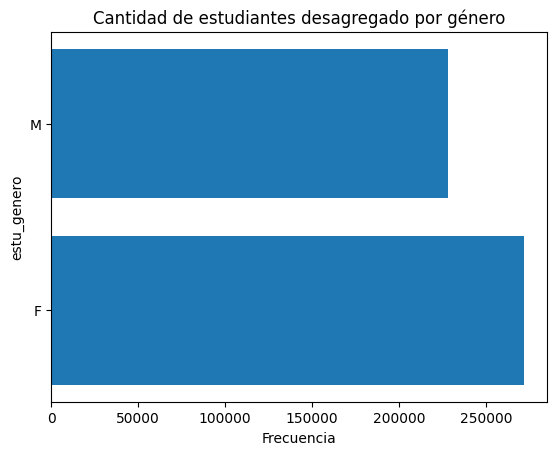

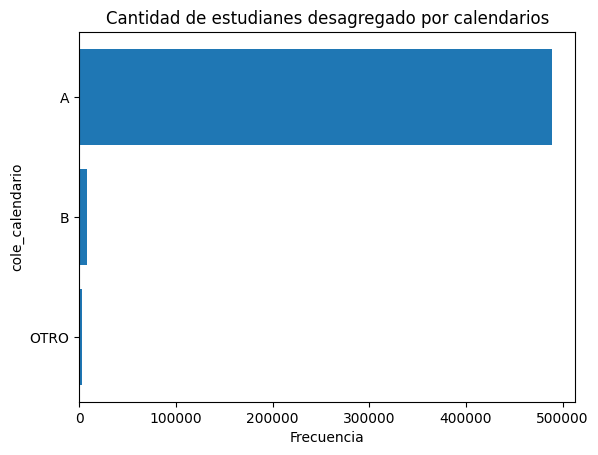

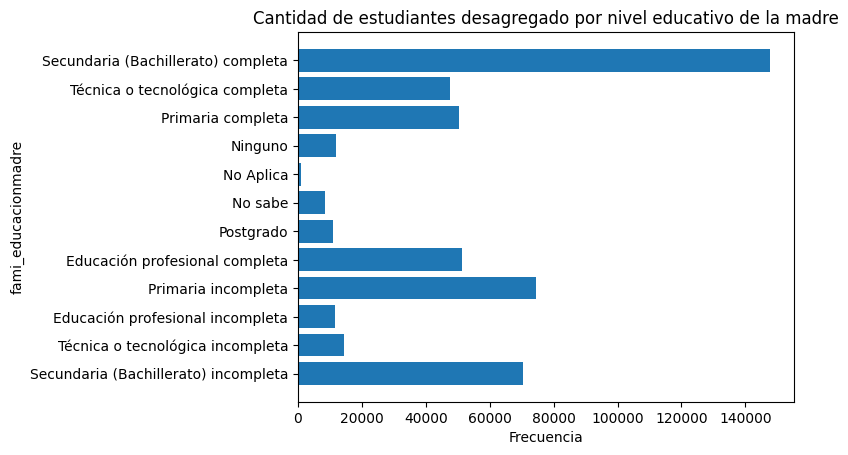

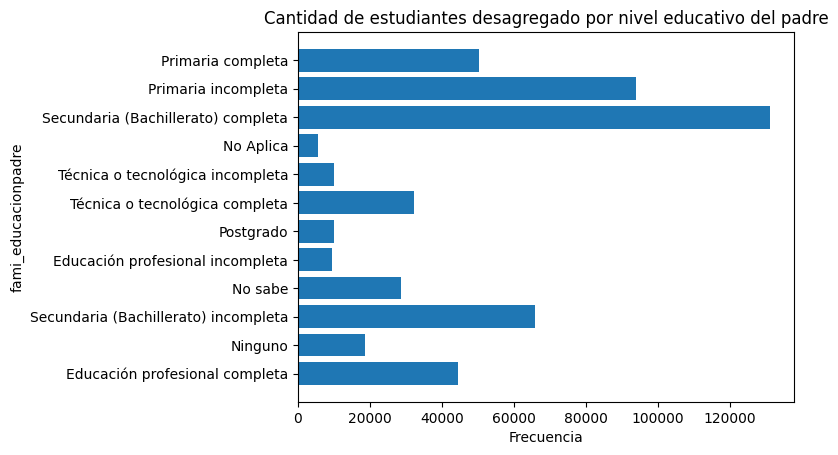

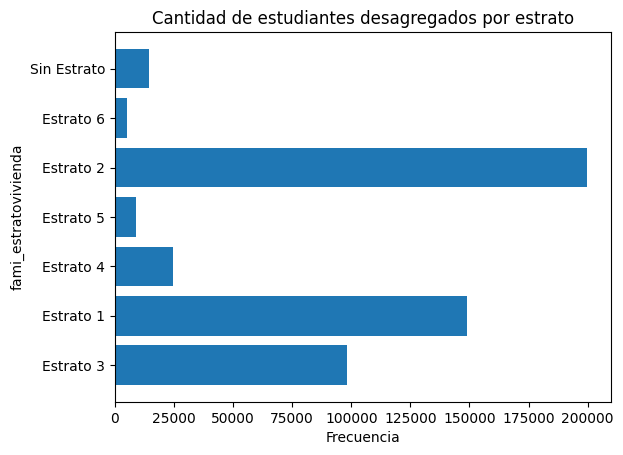

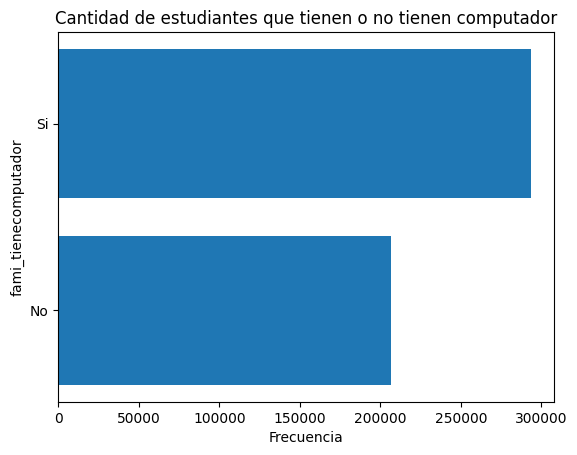

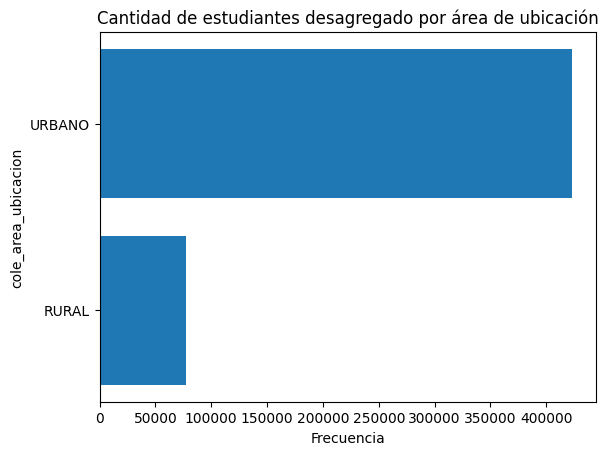

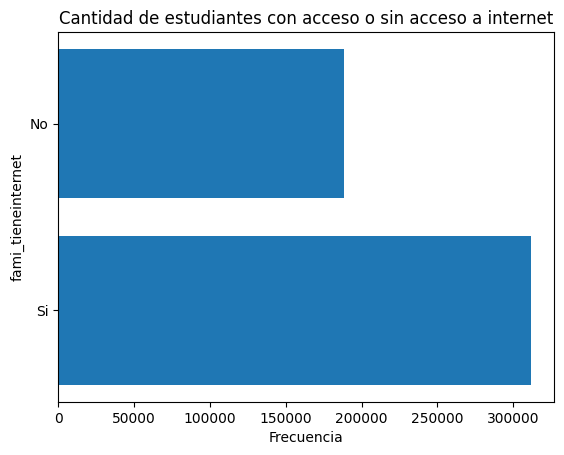

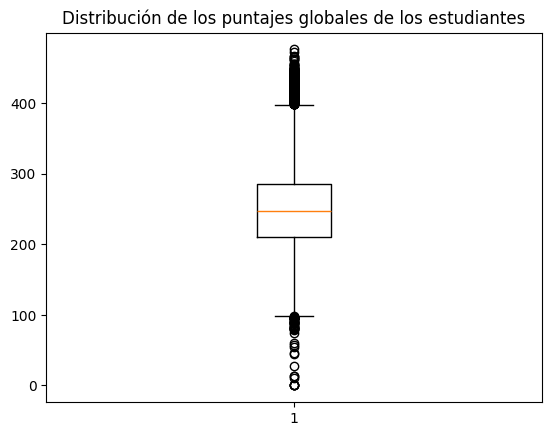

In [24]:
# plot count unique values
var_names_plot = df_h.columns
var_names_plot.remove("punt_global")

titles_plots = ["Cantidad de estudiantes desagregado por género", "Cantidad de estudianes desagregado por calendarios",
                "Cantidad de estudiantes desagregado por nivel educativo de la madre",
                "Cantidad de estudiantes desagregado por nivel educativo del padre",
                "Cantidad de estudiantes desagregados por estrato", "Cantidad de estudiantes que tienen o no tienen computador",
                "Cantidad de estudiantes desagregado por área de ubicación",
                "Cantidad de estudiantes con acceso o sin acceso a internet"]

for i in range(0, len(var_names_plot)):
    count_val = df_h[var_names_plot[i]].value_counts()

    plt.barh(count_val[var_names_plot[i]], count_val["count"])
    plt.xlabel("Frecuencia")
    plt.ylabel(var_names_plot[i])
    plt.title(titles_plots[i])
    plt.show()

plt.boxplot(df_h["punt_global"])
plt.title("Distribución de los puntajes globales de los estudiantes")
plt.show()

In [25]:
# Conteo de la cantidad de valores únicos por columna
pl.DataFrame(
    {
        "col_name": df_h.columns,
        "n_unique_values": [len(df_h[col].unique()) for col in df_h.columns]
    }
).sort("n_unique_values", descending = True)

col_name,n_unique_values
str,i64
"""punt_global""",388
"""fami_educacionmadre""",12
"""fami_educacionpadre""",12
"""fami_estratovivienda""",7
"""cole_calendario""",3
"""estu_genero""",2
"""fami_tienecomputador""",2
"""cole_area_ubicacion""",2
"""fami_tieneinternet""",2


In [26]:
homolgr_vals = {
    "Educación profesional completa" : "Pregrado",
    "Educación profesional incompleta" : "Bachillerato",
    "No Aplica" : "NS",
    "No sabe" : "NS",
    "Técnica o tecnológica completa" : "Tecnica",
    "Técnica o tecnológica incompleta": "Bachillerato",
    "Secundaria (Bachillerato) incompleta" : "Primaria",
    "Secundaria (Bachillerato) completa" : "Bachillerato",
    "Primaria completa" : "Primaria",
    "Primaria incompleta" : "Ninguno",
    "Postgrado" : "Postgrado",
    "Ninguno" : "Ninguno"
}

df_h = df_h.with_columns(
    pl.col("fami_educacionmadre").replace(homolgr_vals).alias("fami_educacionmadre"),
    pl.col("fami_educacionpadre").replace(homolgr_vals).alias("fami_educacionpadre"))

In [27]:
# Conteo de la cantidad de valores perdidos y su proporción por columna
pl.DataFrame(
    {
        "col_name": df_h.columns,
        "n_unique_values": [len(df_h[col].unique()) for col in df_h.columns]
    }
).sort("n_unique_values", descending = True)

col_name,n_unique_values
str,i64
"""punt_global""",388
"""fami_educacionmadre""",7
"""fami_educacionpadre""",7
"""fami_estratovivienda""",7
"""cole_calendario""",3
"""estu_genero""",2
"""fami_tienecomputador""",2
"""cole_area_ubicacion""",2
"""fami_tieneinternet""",2


## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

#### Transformación del formato de datos
- Una vez se realizó la lectura y procesamiento de un gran volumen de información, se procede a trasformar la tabla a un formato mucho más compatible con librerías de visualización y modelamiento.

In [28]:
# trasformar dataframe polars a dataframe pandas
df_h = df_h.to_pandas()

print(type(df_h))

<class 'pandas.core.frame.DataFrame'>


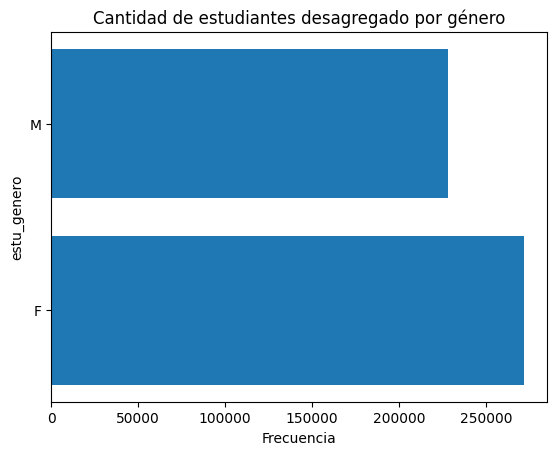

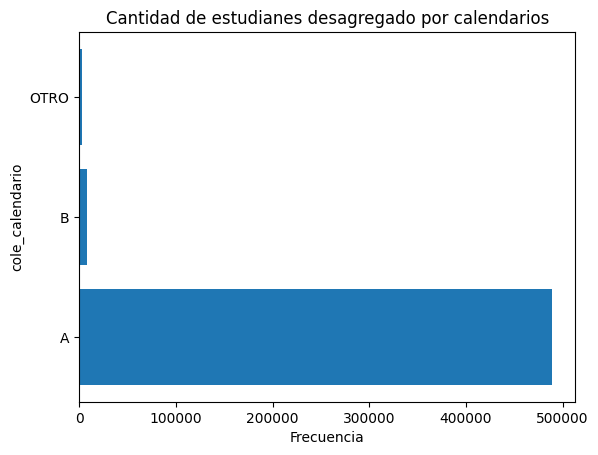

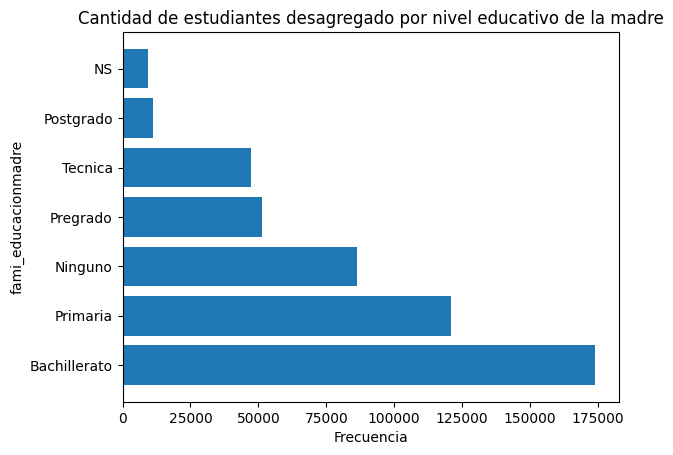

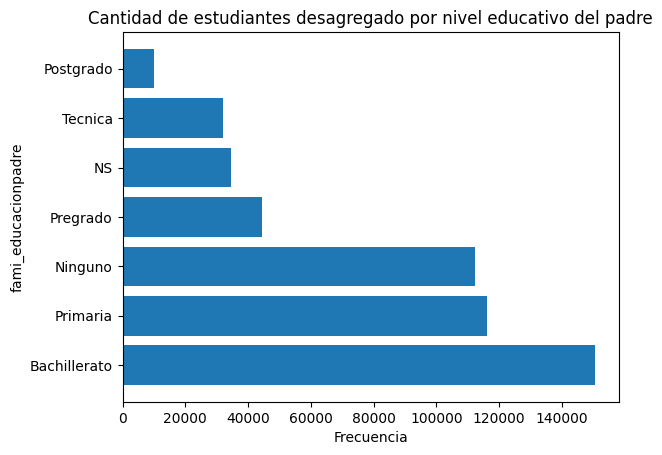

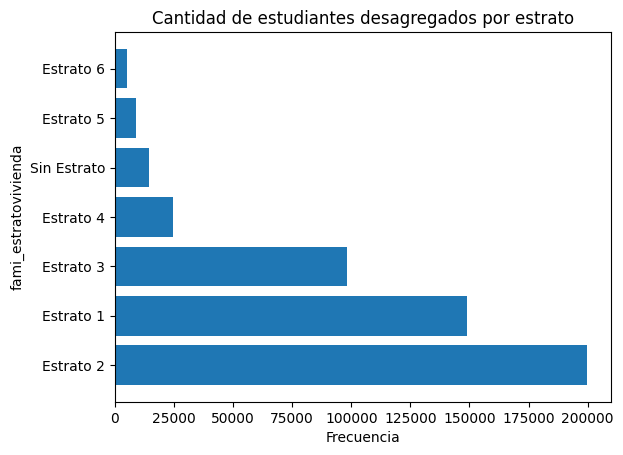

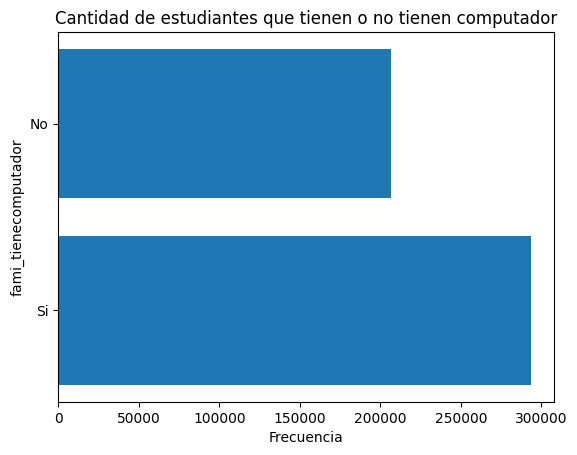

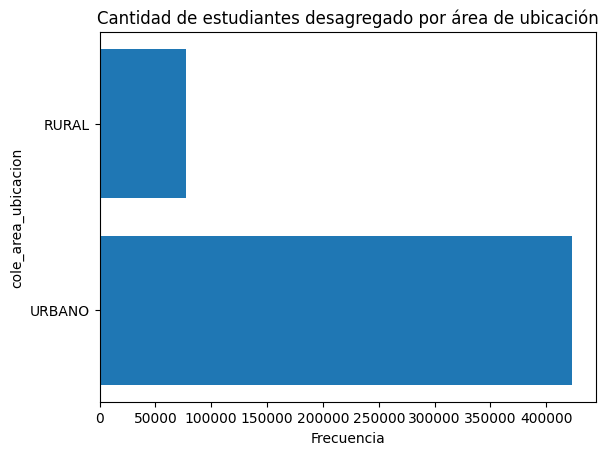

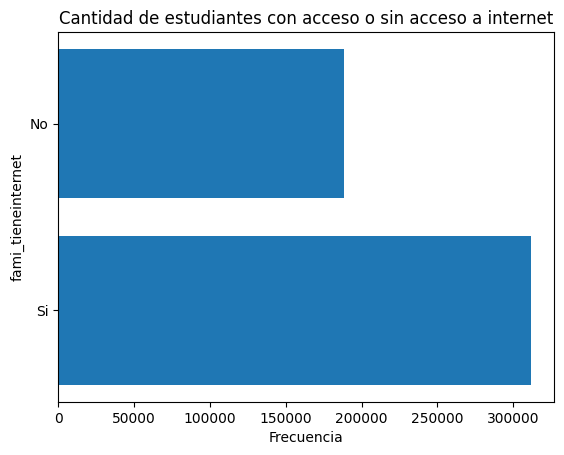

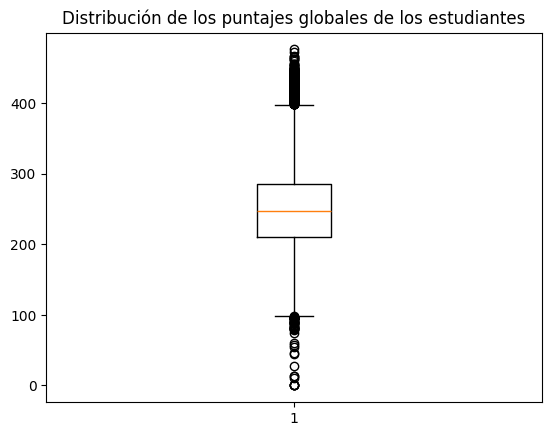

In [40]:
# Luego de aplicar las transformaciones se imprimen nuevamente los conteos por categoría y la distribución de la variable de puntaje global
var_names_plot = df_h.drop("punt_global", axis = 1).columns

titles_plots = ["Cantidad de estudiantes desagregado por género",
                "Cantidad de estudianes desagregado por calendarios",
                "Cantidad de estudiantes desagregado por nivel educativo de la madre",
                "Cantidad de estudiantes desagregado por nivel educativo del padre",
                "Cantidad de estudiantes desagregados por estrato",
                "Cantidad de estudiantes que tienen o no tienen computador",
                "Cantidad de estudiantes desagregado por área de ubicación",
                "Cantidad de estudiantes con acceso o sin acceso a internet"]

for i in range(0, len(var_names_plot)):
    count_val = df_h[var_names_plot[i]].value_counts()
    
    plt.barh(count_val.index, count_val.values)
    plt.xlabel("Frecuencia")
    plt.ylabel(var_names_plot[i])
    plt.title(titles_plots[i])
    plt.show()
    
plt.boxplot(df_h["punt_global"])
plt.title("Distribución de los puntajes globales de los estudiantes")
plt.show()


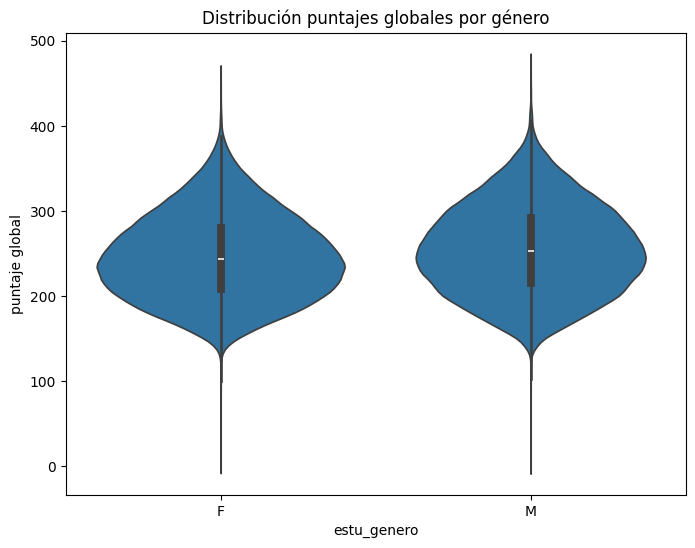

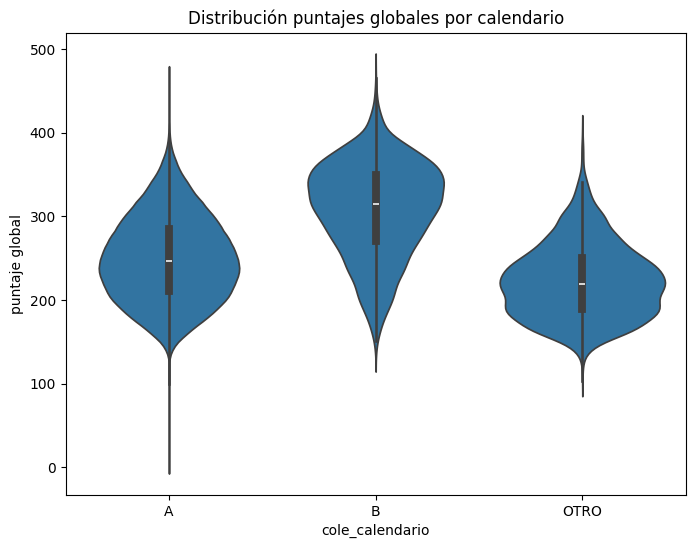

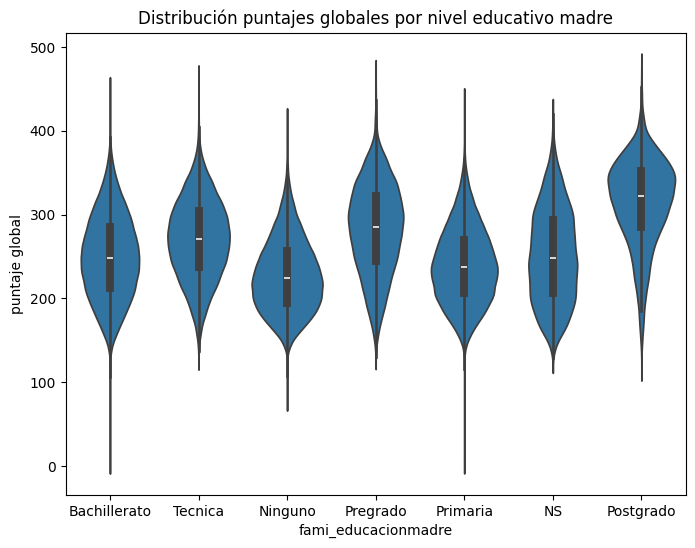

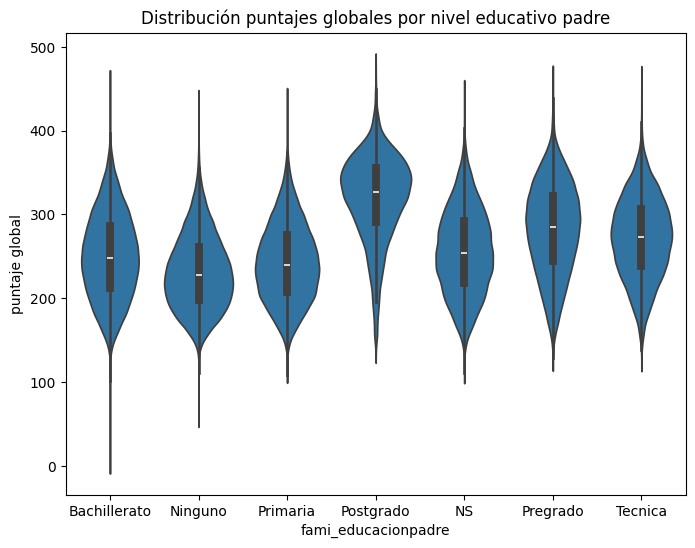

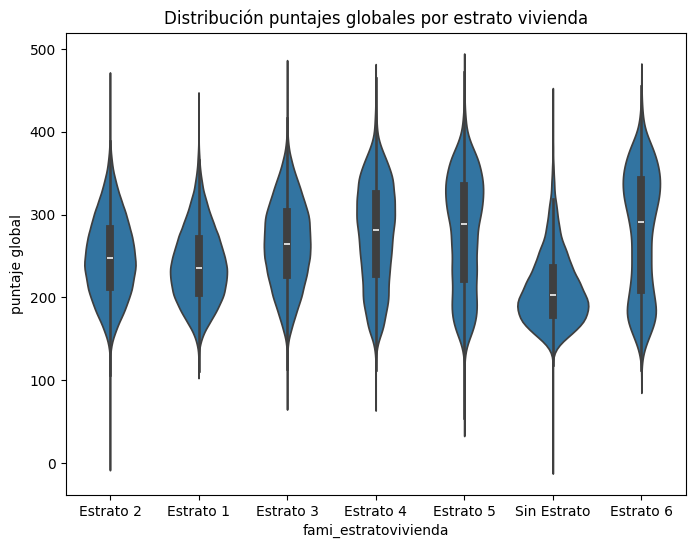

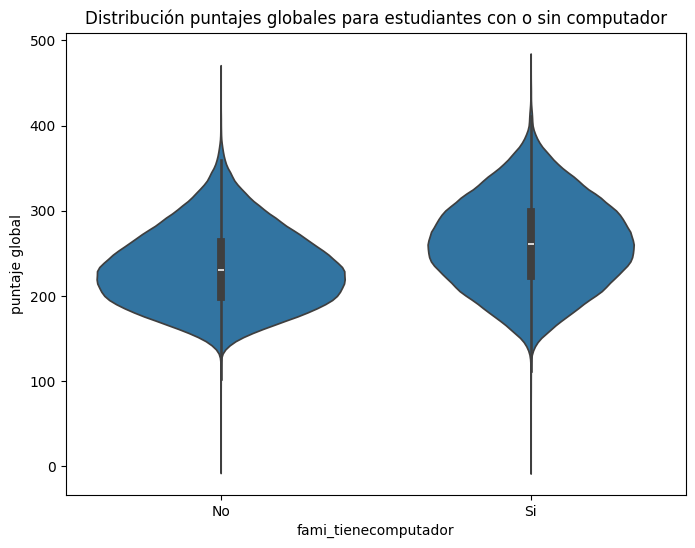

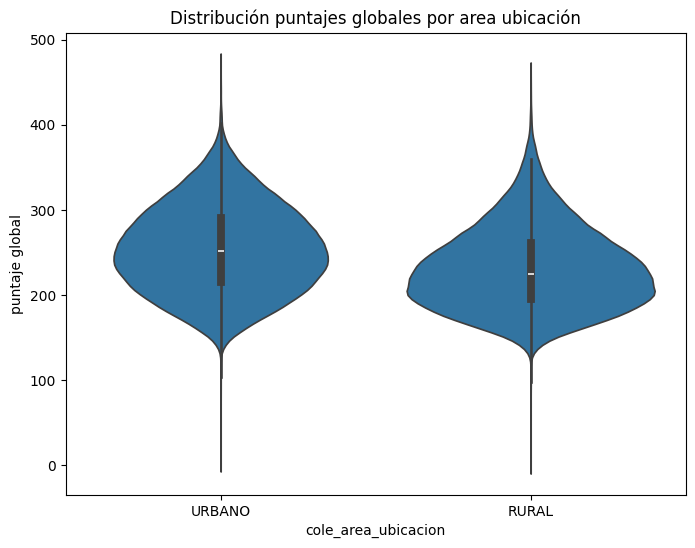

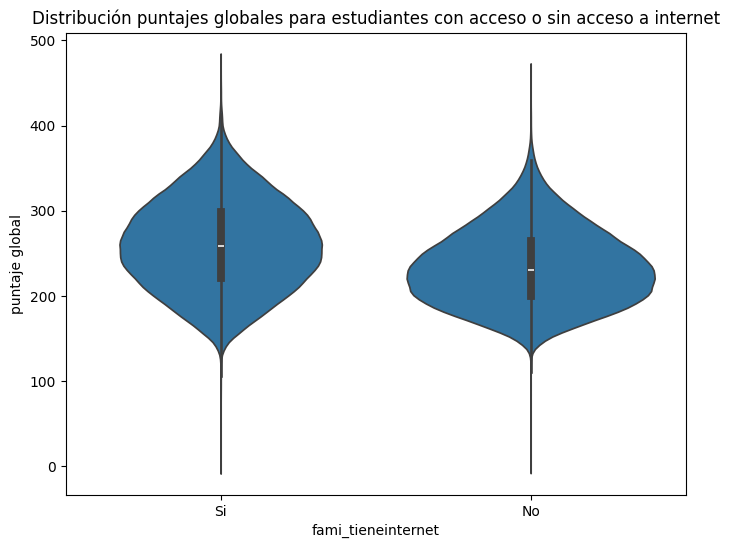

In [29]:
titls_graphs = ["Distribución puntajes globales por género",
                "Distribución puntajes globales por calendario",
                "Distribución puntajes globales por nivel educativo madre",
                "Distribución puntajes globales por nivel educativo padre",
                "Distribución puntajes globales por estrato vivienda",
                "Distribución puntajes globales para estudiantes con o sin computador",
                "Distribución puntajes globales por area ubicación",
                "Distribución puntajes globales para estudiantes con acceso o sin acceso a internet"]

cols_X = df_h.drop("punt_global", axis = 1).columns

for i in range(0, len(cols_X)):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x = cols_X[i], y = "punt_global", data = df_h)
    plt.xlabel(cols_X[i])
    plt.ylabel("puntaje global")
    plt.title(titls_graphs[i])
    plt.show()
    

IndentationError: unexpected indent (2153226037.py, line 2)

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [ ]:
# Implementa tu respuesta en esta celda


## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022